In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

(10000, 32, 32, 3)

0   airplane
1   automobile
2   bird
3   cat
4   deer
5   dog
6   frog
7   horse
8   ship
9   truck

[1]


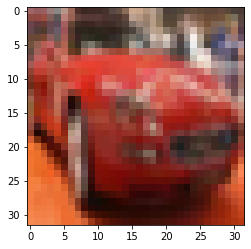

[1]


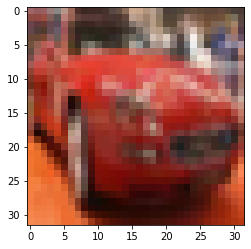

In [ ]:
plt.imshow(x_train[5],cmap="gray")
print(y_train[5])

In [ ]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [ ]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=96,kernel_size = 11,strides = (4,4), padding = 'same',activation = 'ReLU')) #conv1
model.add(keras.layers.AvgPool2D(pool_size=(3,3), strides = (2,2), padding = 'same')) #maxpol1

model.add(Conv2D(filters=256,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'ReLU'))#conv2
model.add(keras.layers.AvgPool2D(pool_size=(3,3), strides = (2,2), padding = 'same'))#maxpol2

model.add(Conv2D(filters=384,kernel_size = 3,strides = (1,1), padding = 'same',activation = 'ReLU'))#conv3
model.add(Conv2D(filters=384,kernel_size = 3,strides = (1,1), padding = 'same',activation = 'ReLU'))#conv4
model.add(Conv2D(filters=256,kernel_size = 3,strides = (1,1), padding = 'same',activation = 'ReLU'))#conv5
model.add(keras.layers.AvgPool2D(pool_size=(3,3), strides = (2,2), padding = 'same'))#maxpol3

#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(4096,activation = 'ReLU'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation = 'ReLU'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 average_pooling2d (AverageP  (None, 4, 4, 96)         0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 average_pooling2d_1 (Averag  (None, 2, 2, 256)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 384)         1

In [ ]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),loss="categorical_crossentropy",metrics=['accuracy']) 
#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
#model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_test, y_test))
#Learning_rate=0.01,mometum=0.9


Epoch 1/20
391/391 [==============================] - 25s 62ms/step - loss: 2.2978 - accuracy: 0.1092 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 2/20
391/391 [==============================] - 24s 61ms/step - loss: 2.1665 - accuracy: 0.1666 - val_loss: 2.0925 - val_accuracy: 0.1924
Epoch 3/20
391/391 [==============================] - 24s 61ms/step - loss: 1.9810 - accuracy: 0.2408 - val_loss: 1.9565 - val_accuracy: 0.2715
Epoch 4/20
391/391 [==============================] - 25s 64ms/step - loss: 1.8679 - accuracy: 0.2851 - val_loss: 1.8540 - val_accuracy: 0.2938
Epoch 5/20
391/391 [==============================] - 25s 64ms/step - loss: 1.7463 - accuracy: 0.3365 - val_loss: 1.6568 - val_accuracy: 0.3788
Epoch 6/20
391/391 [==============================] - 24s 61ms/step - loss: 1.6685 - accuracy: 0.3780 - val_loss: 1.5696 - val_accuracy: 0.4134
Epoch 7/20
391/391 [==============================] - 25s 64ms/step - loss: 1.6034 - accuracy: 0.4122 - val_loss: 1.5386 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 3s 11ms/step - loss: 1.2583 - accuracy: 0.5643


313/313 [==============================] - 3s 11ms/step - loss: 1.2583 - accuracy: 0.5643


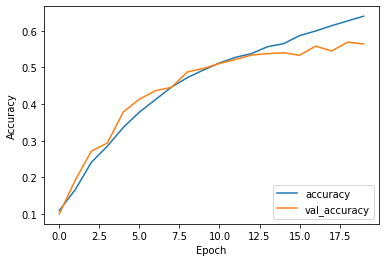

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.2583 - accuracy: 0.5643


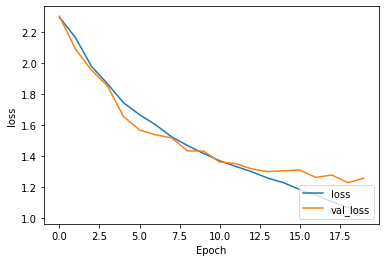

In [ ]:
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)